# 데이터, 패키지 로드

In [1]:
# 패키지
import pandas as pd 
import matplotlib.pyplot as plt
import sys # clova summary
import requests # clova summary
import json # clova summary


In [2]:
# 데이터 로드 
news = pd.read_excel("../../../data/News/news_preprocessed.xlsx") # 파싱, 전처리, 3차 필터링 완료한 뉴스 데이터
news.head() # 확인 

,NEWS_YM,DATE_TIME,WRITER,SUBCATEGORY,TITLE,IMPORTANCE,ITEM_NAME,TAG_LIST,PARSED CONTENT
0,202301,20230102_084347,eDaily,사회,BTS 자리 넘본다…유망주는 스트레이 키즈-KB,67.91,NaN,BTS| 판매량| NCT| 넥스트| 엔하이픈| 블랙핑크| 에스파| 아이브,"- KB증권 “군 입대 BTS에 도전 이어질 것”- “스트레이 키즈, 군 이슈 없고..."
1,202301,20230104_082655,eDaily,경제,BTS 군입대에도 K팝 주가 선방 전망-IBK,67.81,NaN,판매량| 방탄소년단| BTS| 개별| 공연| 글로벌,"- 이환욱 “K팝 앨범 판매 증가, 하이브 주가 상향”[이데일리 최훈길 기자] 방탄..."
2,202301,20230102_100838,eDaily,기술,"[특징주]와이지엔터, 베이비몬스터 데뷔 예고에 6%대↑",68.31,와이지엔터테인먼트,블랙핑크,[이데일리 이정현 기자] 신인 걸그룹 공개를 예고한 와이지엔터테인먼트(122870)...
3,202301,20230119_063002,eDaily,경제,BTS·블랙핑크에 뉴진스까지..K-스타 인기 올라탄 명품,50.47,NaN,블랙핑크| 명품| BTS| 글로벌| 콘텐츠| 방탄소년단| 빅뱅,- 디올은 지민 발렌티노는 슈가 앰버서더 발탁- 뉴진스 하니·혜인도 구찌·루이비통과...
4,202301,20230118_101709,eDaily,사회,"지니뮤직 '케이팝탐사대' ""솔로가 기대되는 아이돌 멤버는?""",45.72,NaN,블랙핑크| 스테이씨| 콘텐츠| 트와이스| 가사,- 지니뮤직 오리지널 오디오 콘텐츠 케이팝 탐사대[이데일리 정다슬 기자] 지니뮤직 ...


# 글자수를 기준으로 데이터 분할

- CLOVA SUMMARY 는 본문+제목의 길이 합이 2000자 이내여야 실행됨
- 2000자를 기준으로 서로 다른 데이터프레임에 저장 

In [3]:
# 제목+본문 글자수 변수(LENGTH_SUM)를 추가 
news['LENGTH_SUM'] = news['TITLE'].str.len() + news['PARSED CONTENT'].str.len()

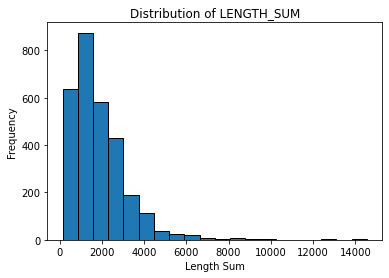

In [4]:
# 히스토그램 그리기
plt.hist(news['LENGTH_SUM'], bins=20, edgecolor='k')
plt.xlabel('Length Sum')
plt.ylabel('Frequency')
plt.title('Distribution of LENGTH_SUM')
plt.show()

In [5]:
# 2000을 기준으로 서로 다른 데이터프레임에 저장 
news_over = news[news['LENGTH_SUM'] >= 2000]
news_under = news[news['LENGTH_SUM'] < 2000]

In [6]:
news_over.info() # 2000자 이상 = 약 천개 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 2 to 2934
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NEWS_YM         1009 non-null   int64  
 1   DATE_TIME       1009 non-null   object 
 2   WRITER          1009 non-null   object 
 3   SUBCATEGORY     1009 non-null   object 
 4   TITLE           1009 non-null   object 
 5   IMPORTANCE      1009 non-null   float64
 6   ITEM_NAME       427 non-null    object 
 7   TAG_LIST        859 non-null    object 
 8   PARSED CONTENT  1009 non-null   object 
 9   LENGTH_SUM      1009 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 86.7+ KB


In [7]:
news_under.info() # 2000자 미만 = 약 2천개 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2938
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NEWS_YM         1930 non-null   int64  
 1   DATE_TIME       1930 non-null   object 
 2   WRITER          1930 non-null   object 
 3   SUBCATEGORY     1930 non-null   object 
 4   TITLE           1930 non-null   object 
 5   IMPORTANCE      1930 non-null   float64
 6   ITEM_NAME       1170 non-null   object 
 7   TAG_LIST        1398 non-null   object 
 8   PARSED CONTENT  1930 non-null   object 
 9   LENGTH_SUM      1930 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 165.9+ KB


# news_under CLOVA SUMMARY

- **제목+본문 2000자 이내에 대해 요약문 생성**

In [8]:
# 요약글 넣을 변수 설정 
news_under['SUMMARY'] = ""

/var/folders/4t/dyhc70gd7zjdwxdh7x7f77240000gn/T/ipykernel_96596/1197848709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_under['SUMMARY'] = ""


In [9]:
# 기본 옵션 세팅 작업

#!/usr/bin/env python3
#-*- codig: utf-8 -*-

client_id = "5bgb8zehd8"
client_secret = "yunrcvpfGN1Lrw8TR1X8xTxt8Eem1fJGX4EzRoaT"
headers = {
    "X-NCP-APIGW-API-KEY-ID": client_id,
    "X-NCP-APIGW-API-KEY": client_secret,
    "Content-Type": "application/json"
}

language = "ko" # Language of document (ko, ja )
model = "news" # Model used for summaries (general, news)
tone = "2" # Converts the tone of the summarized result. (0, 1, 2, 3)
summaryCount = "5" # This is the number of sentences for the summarized document.
url= "https://naveropenapi.apigw.ntruss.com/text-summary/v1/summarize" 

In [10]:
# SUMMARY가 잘 되는지 테스팅(하나의 본문에 대해 요약문 생성해봄)

# title= ""
content = news_under['PARSED CONTENT'].iloc[3]
data = {
    "document": {
    #"title": title,
    "content" : content
    },
    "option": {
    "language": language,
    "model": model,
    "tone": tone,
    "summaryCount" : summaryCount
    }
}
print(json.dumps(data, indent=4, sort_keys=True))
response = requests.post(url, data=json.dumps(data), headers=headers)
rescode = response.status_code
if(rescode == 200):
    print (response.text)
else:
    print("Error : " + response.text)

{
    "document": {
        "content": "[\uc774\ub370\uc77c\ub9ac \uae40\uc18c\uc5f0 \uae30\uc790] NH\ud22c\uc790\uc99d\uad8c\uc740 19\uc77c \uc640\uc774\uc9c0\uc5d4\ud130\ud14c\uc778\uba3c\ud2b8(122870)\uc5d0 \ub300\ud574 \uacfc\ub3c4\ud55c \ub2e8\uc77c \uc544\ud2f0\uc2a4\ud2b8 \uc758\uc874\ub3c4\uac00 \ud574\uc18c\ub420 \uac83\uc73c\ub85c \uc804\ub9dd\ud588\ub2e4. \ube14\ub799\ud551\ud06c \uc7ac\uacc4\uc57d\ub3c4 \ubb34\ub09c\ud55c \uc9c4\ud589\uc774 \uc608\uc0c1\uc678\uae30 \ub54c\ubb38\uc5d0 \uc640\uc774\uc9c0\uc5d4\ud130\uac00 \uacbd\uc7c1\uc0ac \ub300\ube44 \uc800\ud3c9\uac00\ub41c \uc0c1\ud0dc\ub77c\ub294 \ubd84\uc11d\uc774\ub2e4. \ud22c\uc790\uc758\uacac \u2018\ub9e4\uc218\u2019, \ubaa9\ud45c\uc8fc\uac00 7\ub9cc7000\uc6d0\uc744 \uac01\uac01 \uc720\uc9c0\ud588\ub2e4. \ud604\uc7ac \uc640\uc774\uc9c0\uc5d4\ud130 \uc8fc\uac00\ub294 18\uc77c \uae30\uc900 4\ub9cc9650\uc6d0\uc774\ub2e4. \uc774\ud654\uc815 NH\ud22c\uc790\uc99d\uad8c \uc5f0\uad6c\uc6d0\uc740 \uc774\ub0a0 \ubcf4\uace0\uc

- 요약문이 잘 생성됨을 확인함
- 위의 코드를 함수화하여 전체 기사에 대한 요약문 생성 작업 진행

In [11]:
# 요약문 생성 함수 
def generate_summary(df, language, model, tone, summaryCount):

    def generate_single_summary(row):
        content = row['PARSED CONTENT']
        title = row['TITLE']

        data = {
            "document": {
                "title": title,
                "content": content
            },
            "option": {
                "language": language,
                "model": model,
                "tone": tone,
                "summaryCount": summaryCount
            }
        }

        response = requests.post(url, data=json.dumps(data), headers=headers)
        rescode = response.status_code
        if rescode == 200:
            summary = json.loads(response.text)["summary"]
            return summary
        else:
            return "Error : " + response.text
    
    df['SUMMARY'] = df.apply(generate_single_summary, axis=1)
    return df


In [12]:
# 전체 뉴스 기사에 함수 적용
result_dataframe = generate_summary(news_under, language, model, tone, summaryCount)

/var/folders/4t/dyhc70gd7zjdwxdh7x7f77240000gn/T/ipykernel_96596/3186641854.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUMMARY'] = df.apply(generate_single_summary, axis=1)


In [13]:
# 적용 결과 확인
result_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2938
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NEWS_YM         1930 non-null   int64  
 1   DATE_TIME       1930 non-null   object 
 2   WRITER          1930 non-null   object 
 3   SUBCATEGORY     1930 non-null   object 
 4   TITLE           1930 non-null   object 
 5   IMPORTANCE      1930 non-null   float64
 6   ITEM_NAME       1170 non-null   object 
 7   TAG_LIST        1398 non-null   object 
 8   PARSED CONTENT  1930 non-null   object 
 9   LENGTH_SUM      1930 non-null   int64  
 10  SUMMARY         1930 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 180.9+ KB


In [14]:
# 적용 결과 확인
result_dataframe['SUMMARY'].iloc[1000]

'SM엔터테인먼트 현 경영진이 경쟁사 하이브와 경영권 분쟁을 벌이고 있는 가운데 소액주주들에게 서한을 보내 지지를 호소했습니다.\n1일 가요계에 따르면 SM은 최근 소액주주들에게 \'에스엠엔터테인먼트 주주님께\'라는 제목의 서한을 보내 "하이브 이사회는 당연히 새로운 사업 기회를 (SM이 아닌) 하이브에 줄 것"이라고 주장했다.SM은 "이번 사태는 한국 엔터테인먼트 역사에서 다시 없을 중요한 일"이라며 "주주님들의 이번 결정에 따라 당사의 미래는 아주 크게 달라질 것"이라고 강조했습니다.\n이어 "올해 주주총회는 지난 십 수년간 이어져 온 SM의 거버넌스 이슈를 완전히 해소하고 국내 최고의 아티스트 풀을 보유한 엔터테인먼트사로서 기업가치를 한 단계 더 올릴 수 있는 마지막 기회"라고 덧붙었습니다.\n특히 SM은 하이브와 업계 최대 경쟁사임을 강조하며 부정적 측면이 발생할 수 있다는 주장을 펼치기도 했다.SM은 "좋은 연습생도, 좋은 곡도, 좋은 안무가와 공연 기획도 모두 하이브가 SM에 가지는 지분율보다 더 높은 지분율을 가진 빅히트(방탄소년단 소속사), 어도어(뉴진스 소속사), 쏘스뮤직(르세라핌 소속사), 플레디스(세븐틴 소속사) 같은 산하 레이블에 먼저 배정할 수밖에 없다"고 했습니다.\n또 "하이브가 SM 지분을 최대 40%까지만 보유하고 나머지 60%는 일반 주주들이 가지게 되면 SM 주주와 하이브 주주 사이에는 이해 상충이 발생할 수밖에 없다"고 주장하기도 했습니다.'

### 요약문 저장 

In [15]:
# 데이터 저장
file_path = '../../../data/News/news_summary_under.xlsx'  
result_dataframe.to_excel(file_path, index=False)